In [1]:
import pandas as pd

df = pd.read_csv('../data-p2/mimic3d.csv')


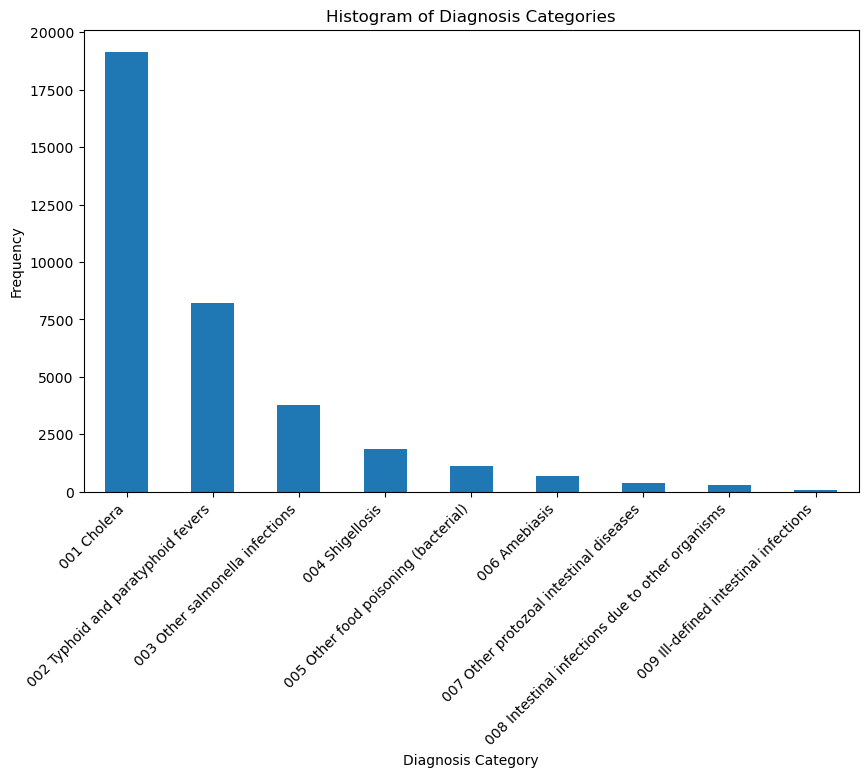

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the category ranges and labels
categories = {
    '001 Cholera': (1.0, 1.9),
    '002 Typhoid and paratyphoid fevers': (2.0, 2.9),
    '003 Other salmonella infections': (3.0, 3.9),
    '004 Shigellosis': (4.0, 4.9),
    '005 Other food poisoning (bacterial)': (5.0, 5.9),
    '006 Amebiasis': (6.0, 6.9),
    '007 Other protozoal intestinal diseases': (7.0, 7.9),
    '008 Intestinal infections due to other organisms': (8.0, 8.8),
    '009 Ill-defined intestinal infections': (9.0, 9.3),
}

# Function to map each value to the correct category
def map_to_category(value):
    for category, (low, high) in categories.items():
        if low <= value <= high:
            return category
    return None  # For values outside these ranges

# Apply the mapping function to the 'NumDiagnosis' column
df['DiagnosisCategory'] = df['NumDiagnosis'].dropna().apply(map_to_category)

# Filter out rows where 'DiagnosisCategory' is None
df_filtered = df.dropna(subset=['DiagnosisCategory'])

# Create the histogram
plt.figure(figsize=(10, 6))
df_filtered['DiagnosisCategory'].value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Diagnosis Categories')
plt.xlabel('Diagnosis Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [23]:
# Define keywords for each diagnosis category, including anatomy-related terms
cardiology_keywords = ["cardiac", "heart", "coronary", "angina", "myocardial", "aorta", "ventricle", "atrium"]
pulmonology_keywords = ["lung", "pulmonary", "asthma", "bronchitis", "pneumonia", "trachea", "bronchi", "alveoli"]
neurology_keywords = ["stroke", "seizure", "neuro", "brain", "epilepsy", "nervous", "spinal", "cerebral", "cranial"]
gastro_keywords = ["stomach", "gastro", "liver", "hepatic", "intestinal", "colon", "bowel", "digestive", "pancreas"]
musculoskeletal_keywords = ["muscle", "bone", "joint", "arthritis", "spine", "vertebra", "tendon", "ligament", "skeletal"]
renal_keywords = ["kidney", "renal", "nephro", "bladder", "urinary", "urethra", "ureter"]
endocrine_keywords = ["diabetes", "thyroid", "hormone", "endocrine", "pituitary", "adrenal", "insulin", "pancreas"]

# Function to categorize based on diagnosis keywords
def categorize_diagnosis(diagnosis):
    diagnosis_lower = str(diagnosis).lower()
    if any(keyword in diagnosis_lower for keyword in cardiology_keywords):
        return "Cardiology"
    elif any(keyword in diagnosis_lower for keyword in pulmonology_keywords):
        return "Pulmonology"
    elif any(keyword in diagnosis_lower for keyword in neurology_keywords):
        return "Neurology"
    elif any(keyword in diagnosis_lower for keyword in gastro_keywords):
        return "Gastrointestinal"
    elif any(keyword in diagnosis_lower for keyword in musculoskeletal_keywords):
        return "Musculoskeletal"
    elif any(keyword in diagnosis_lower for keyword in renal_keywords):
        return "Renal"
    elif any(keyword in diagnosis_lower for keyword in endocrine_keywords):
        return "Endocrine"
    else:
        return "Other"

# Apply the function to create a new column
df['DiagnosisCategory'] = df['AdmitDiagnosis'].apply(categorize_diagnosis)

# Count the number of flagged items per category for summary table
summary = df['DiagnosisCategory'].value_counts().reset_index()
summary.columns = ["Category", "NumFlagged_Items"]

# Define the keyword list for each category for the table
category_keywords = {
    "Cardiology": ", ".join(cardiology_keywords),
    "Pulmonology": ", ".join(pulmonology_keywords),
    "Neurology": ", ".join(neurology_keywords),
    "Gastrointestinal": ", ".join(gastro_keywords),
    "Musculoskeletal": ", ".join(musculoskeletal_keywords),
    "Renal": ", ".join(renal_keywords),
    "Endocrine": ", ".join(endocrine_keywords),
    "Other": "N/A"
}

# Add keywords to the summary table
summary['Keywords'] = summary['Category'].map(category_keywords)

# Display summary as a Markdown table
import pandas as pd
markdown_table = summary.to_markdown(index=False)
print(markdown_table)

| Category         |   NumFlagged_Items | Keywords                                                                       |
|:-----------------|-------------------:|:-------------------------------------------------------------------------------|
| Other            |              38638 | N/A                                                                            |
| Cardiology       |               8483 | cardiac, heart, coronary, angina, myocardial, aorta, ventricle, atrium         |
| Pulmonology      |               3929 | lung, pulmonary, asthma, bronchitis, pneumonia, trachea, bronchi, alveoli      |
| Neurology        |               3317 | stroke, seizure, neuro, brain, epilepsy, nervous, spinal, cerebral, cranial    |
| Gastrointestinal |               2647 | stomach, gastro, liver, hepatic, intestinal, colon, bowel, digestive, pancreas |
| Renal            |               1627 | kidney, renal, nephro, bladder, urinary, urethra, ureter                       |
| Musculoskeleta

In [22]:
# Define keywords for each type of medical procedure category
surgical_keywords = ["surgery", "operation", "resection", "excision", "laparotomy", "amputation", "biopsy"]
diagnostic_keywords = ["scan", "x-ray", "ultrasound", "mri", "ct", "imaging", "biopsy", "diagnostic"]
therapeutic_keywords = ["therapy", "treatment", "chemotherapy", "radiation", "rehabilitation", "transfusion"]
emergency_keywords = ["intubation", "cpr", "resuscitation", "emergency", "trauma", "triage"]
preventive_keywords = ["vaccination", "screening", "check-up", "preventive", "immunization"]
cardiovascular_keywords = ["angioplasty", "stent", "bypass", "pacemaker", "cardiac", "heart"]
respiratory_keywords = ["ventilation", "tracheotomy", "bronchoscopy", "thoracotomy", "oxygen", "pulmonary"]
gastrointestinal_keywords = ["endoscopy", "colonoscopy", "gastrectomy", "biopsy", "bowel", "liver"]
musculoskeletal_keywords = ["arthroscopy", "joint", "spine", "orthopedic", "tendon", "ligament"]
renal_keywords = ["dialysis", "nephrectomy", "catheter", "kidney", "bladder", "renal"]
endocrine_keywords = ["thyroidectomy", "insulin", "hormone", "adrenal", "pancreas", "endocrine"]

# Function to categorize based on procedure keywords
def categorize_procedure(procedure):
    procedure_lower = str(procedure).lower()
    if any(keyword in procedure_lower for keyword in surgical_keywords):
        return "Surgical"
    elif any(keyword in procedure_lower for keyword in diagnostic_keywords):
        return "Diagnostic"
    elif any(keyword in procedure_lower for keyword in therapeutic_keywords):
        return "Therapeutic"
    elif any(keyword in procedure_lower for keyword in emergency_keywords):
        return "Emergency"
    elif any(keyword in procedure_lower for keyword in preventive_keywords):
        return "Preventive"
    elif any(keyword in procedure_lower for keyword in cardiovascular_keywords):
        return "Cardiovascular"
    elif any(keyword in procedure_lower for keyword in respiratory_keywords):
        return "Respiratory"
    elif any(keyword in procedure_lower for keyword in gastrointestinal_keywords):
        return "Gastrointestinal"
    elif any(keyword in procedure_lower for keyword in musculoskeletal_keywords):
        return "Musculoskeletal"
    elif any(keyword in procedure_lower for keyword in renal_keywords):
        return "Renal"
    elif any(keyword in procedure_lower for keyword in endocrine_keywords):
        return "Endocrine"
    else:
        return "Other"

# Apply the function to create a new column
df['ProcedureCategory'] = df['AdmitProcedure'].apply(categorize_procedure)

# Count the number of flagged items per category for summary table
summary = df['ProcedureCategory'].value_counts().reset_index()
summary.columns = ["Category", "NumFlagged_Items"]

# Define the keyword list for each category for the table
category_keywords = {
    "Surgical": ", ".join(surgical_keywords),
    "Diagnostic": ", ".join(diagnostic_keywords),
    "Therapeutic": ", ".join(therapeutic_keywords),
    "Emergency": ", ".join(emergency_keywords),
    "Preventive": ", ".join(preventive_keywords),
    "Cardiovascular": ", ".join(cardiovascular_keywords),
    "Respiratory": ", ".join(respiratory_keywords),
    "Gastrointestinal": ", ".join(gastrointestinal_keywords),
    "Musculoskeletal": ", ".join(musculoskeletal_keywords),
    "Renal": ", ".join(renal_keywords),
    "Endocrine": ", ".join(endocrine_keywords),
    "Other": "N/A"
}

# Add keywords to the summary table
summary['Keywords'] = summary['Category'].map(category_keywords)

# Display summary as a Markdown table
import pandas as pd
markdown_table = summary.to_markdown(index=False)
print(markdown_table)

| Category         |   NumFlagged_Items | Keywords                                                                 |
|:-----------------|-------------------:|:-------------------------------------------------------------------------|
| Other            |              43133 | N/A                                                                      |
| Diagnostic       |               3991 | scan, x-ray, ultrasound, mri, ct, imaging, biopsy, diagnostic            |
| Preventive       |               2683 | vaccination, screening, check-up, preventive, immunization               |
| Cardiovascular   |               2587 | angioplasty, stent, bypass, pacemaker, cardiac, heart                    |
| Surgical         |               2008 | surgery, operation, resection, excision, laparotomy, amputation, biopsy  |
| Gastrointestinal |               1760 | endoscopy, colonoscopy, gastrectomy, biopsy, bowel, liver                |
| Renal            |               1417 | dialysis, nephrectomy,

In [19]:
df['AdmitProcedure'].value_counts()

AdmitProcedure
na                          8032
Cont inv mec ven <96 hrs    3349
Vaccination NEC             2667
Venous cath NEC             1947
Insert endotracheal tube    1866
                            ... 
Oth part excision thymus       1
Pedicle graft/flap NOS         1
Suture penile laceration       1
Skull plate removal            1
Hemorrhoid procedure NEC       1
Name: count, Length: 1277, dtype: int64

In [28]:
ethnicity_mapping = {
    "ASIAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - CAMBODIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - FILIPINO": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - OTHER": "ASIAN",
    "ASIAN - VIETNAMESE": "ASIAN",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "BLACK/HAITIAN": "BLACK",
    "CARIBBEAN ISLAND": "OTHER",
    "HISPANIC OR LATINO": "HISPANIC",
    "HISPANIC/LATINO - CUBAN": "HISPANIC",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC",
    "MIDDLE EASTERN": "OTHER",
    "MULTI RACE ETHNICITY": "OTHER",
    "OTHER": "OTHER",
    "PATIENT DECLINED TO ANSWER": "UNAVAILABLE",
    "PORTUGUESE": "OTHER",
    "SOUTH AMERICAN": "OTHER",
    "UNABLE TO OBTAIN": "UNAVAILABLE",
    "UNKNOWN/NOT SPECIFIED": "UNAVAILABLE",
    "WHITE": "WHITE",
    "WHITE - BRAZILIAN": "WHITE",
    "WHITE - EASTERN EUROPEAN": "WHITE",
    "WHITE - OTHER EUROPEAN": "WHITE",
    "WHITE - RUSSIAN": "WHITE"
}


df['ethnicity'] = df['ethnicity'].map(ethnicity_mapping)

df['ethnicity'].value_counts('F')

ethnicity
WHITE          0.702758
UNAVAILABLE    0.100265
BLACK          0.097629
HISPANIC       0.035423
ASIAN          0.033943
OTHER          0.029981
Name: proportion, dtype: float64

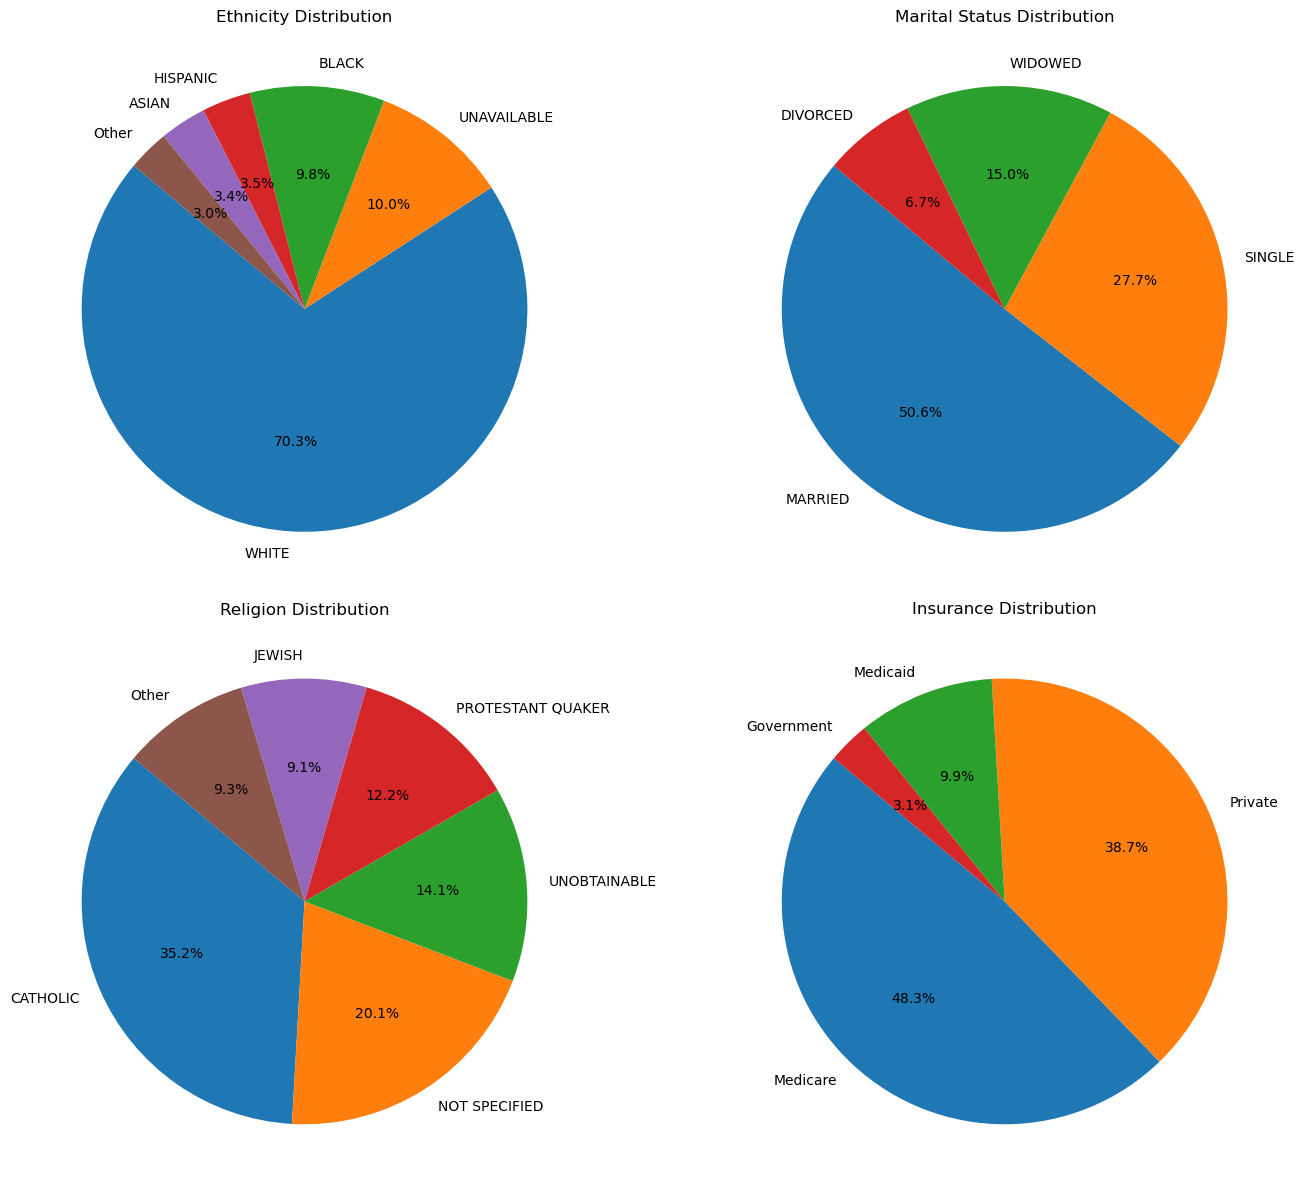

In [64]:
import matplotlib.pyplot as plt

# Define a function to get top 5 categories plus "Other" for each column
def get_top5_and_other(series):
    top5 = series.value_counts().nlargest(5)
    other_count = series.value_counts()[5:].sum()  # Sum of remaining values
    top5['Other'] = other_count  # Add "Other" as the 6th category
    return top5

# Define a function to filter out values less than the specified threshold (2%)
def filter_by_percentage(counts, threshold=0.02):
    total = counts.sum()
    return counts[counts / total > threshold]

# Get the top 5 + "Other" for each column
ethnicity_counts = get_top5_and_other(df['ethnicity'])
marital_status_counts = get_top5_and_other(df['marital_status'])
religion_counts = get_top5_and_other(df['religion'])
insurance_counts = get_top5_and_other(df['insurance'])

# Filter the counts to show only values greater than 2%
ethnicity_counts_filtered = filter_by_percentage(ethnicity_counts)
marital_status_counts_filtered = filter_by_percentage(marital_status_counts)
religion_counts_filtered = filter_by_percentage(religion_counts)
insurance_counts_filtered = filter_by_percentage(insurance_counts)

# Set up the grid for 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot each pie chart with filtered values
axs[0, 0].pie(ethnicity_counts_filtered, labels=ethnicity_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Ethnicity Distribution')

axs[0, 1].pie(marital_status_counts_filtered, labels=marital_status_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Marital Status Distribution')

axs[1, 0].pie(religion_counts_filtered, labels=religion_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Religion Distribution')

axs[1, 1].pie(insurance_counts_filtered, labels=insurance_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Insurance Distribution')

# Display the grid of pie charts
plt.tight_layout()
plt.show()

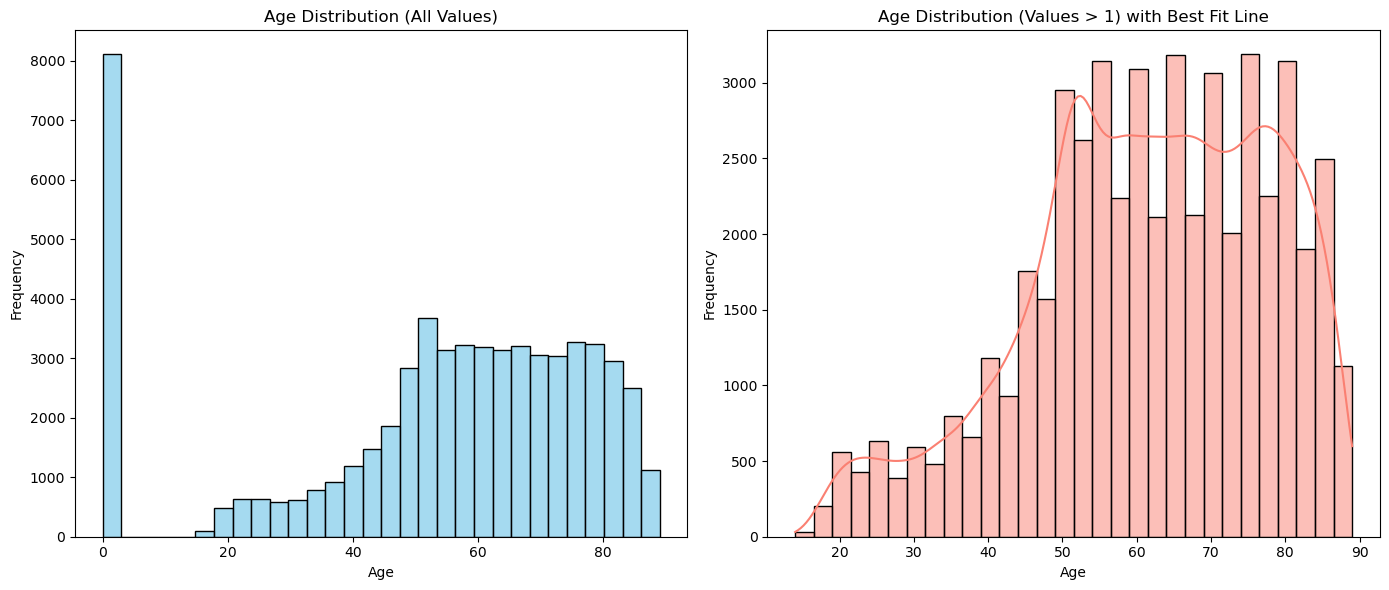

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the grid for 1x2 layout
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for all age values
sns.histplot(df['age'], bins=30, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Age Distribution (All Values)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot histogram with KDE for age values greater than 1
sns.histplot(df[df['age'] > 1]['age'], bins=30, color='salmon', edgecolor='black', kde=True, ax=axs[1])
axs[1].set_title('Age Distribution (Values > 1) with Best Fit Line')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Frequency')

# Display the grid of histograms
plt.tight_layout()
plt.show()

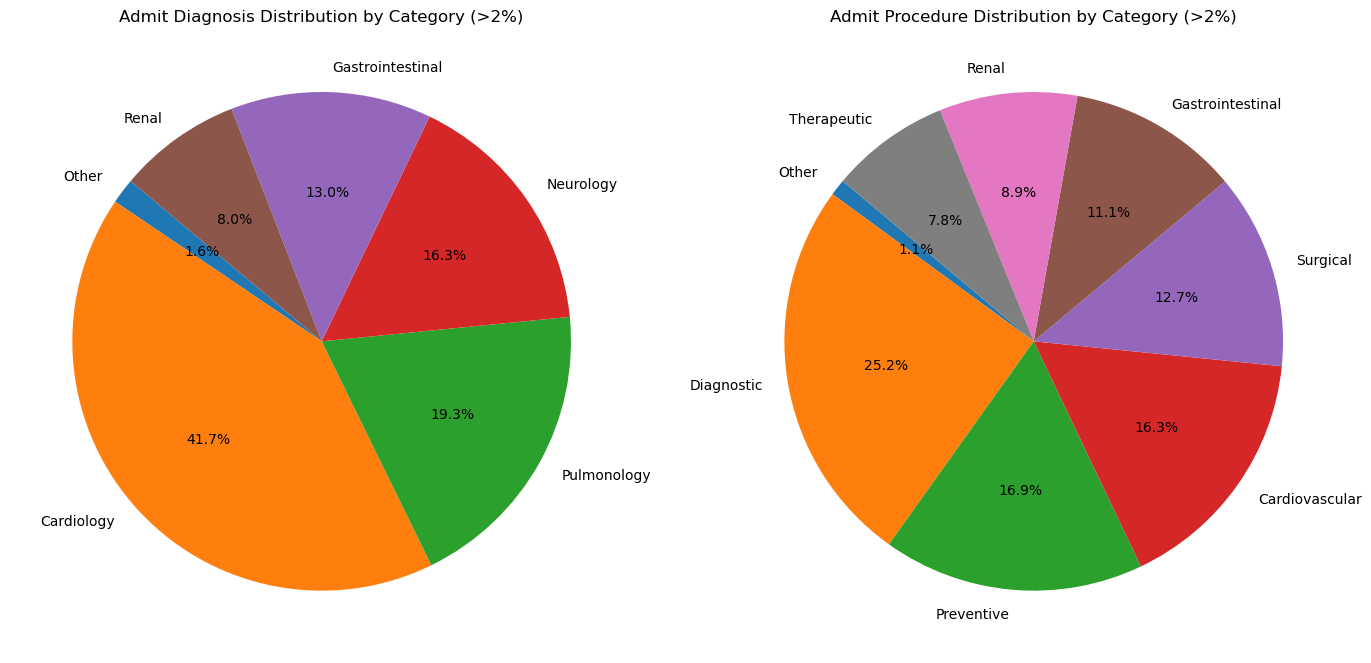

In [34]:
import matplotlib.pyplot as plt

def filter_and_group(series, threshold=0.02):
    # Calculate percentage of each category
    series_percent = series / series.sum()
    
    # Separate out categories above the threshold
    above_threshold = series[series_percent >= threshold]
    
    # Sum categories below threshold into 'Other'
    below_threshold_sum = series[series_percent < threshold].sum()
    if below_threshold_sum > 0:
        above_threshold['Other'] = below_threshold_sum
    
    return above_threshold

# Count occurrences of each category for AdmitDiagnosis and AdmitProcedure
diagnosis_counts = df['DiagnosisCategory'].value_counts()
procedure_counts = df['ProcedureCategory'].value_counts()

# Apply filtering to only show categories with >2% and group the rest as 'Other'
diagnosis_counts_filtered = filter_and_group(diagnosis_counts)
procedure_counts_filtered = filter_and_group(procedure_counts)

# Set up the grid for 1x2 layout
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for AdmitDiagnosis categories
axs[0].pie(diagnosis_counts_filtered, labels=diagnosis_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Admit Diagnosis Distribution by Category (>2%)')

# Pie chart for AdmitProcedure categories
axs[1].pie(procedure_counts_filtered, labels=procedure_counts_filtered.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Admit Procedure Distribution by Category (>2%)')

# Display the grid of pie charts
plt.tight_layout()
plt.show()

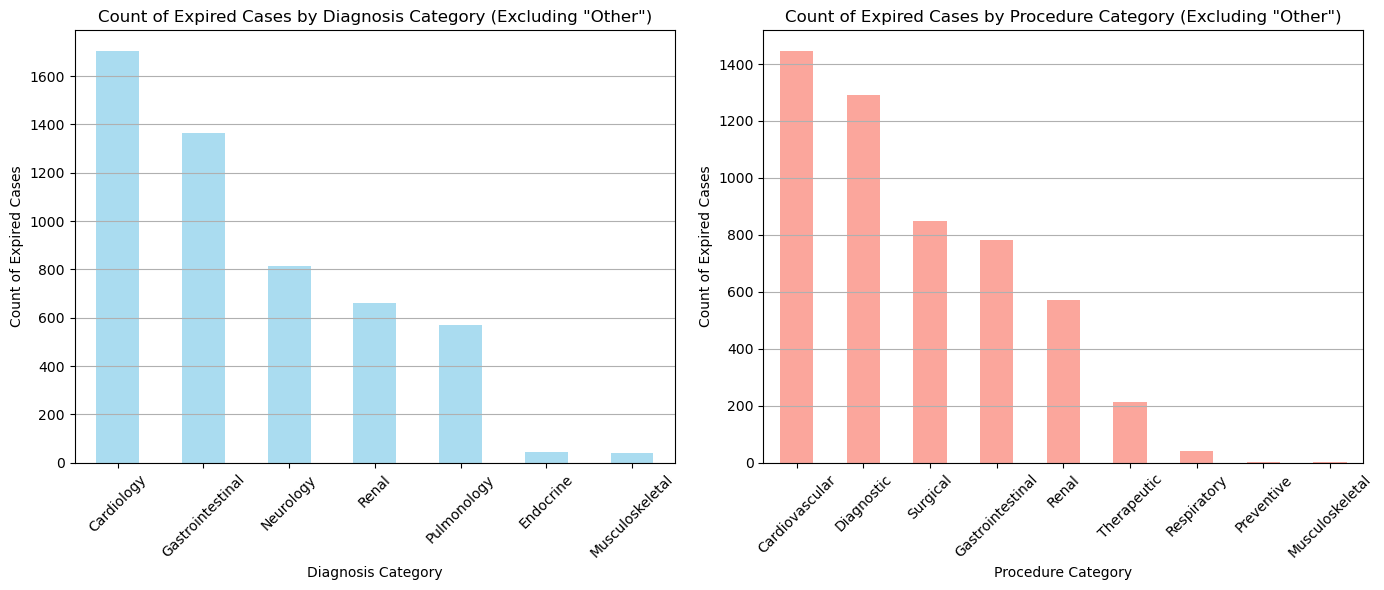

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and has the correct format
# Convert ExpiredHospital column to binary if not already done
df['ExpiredHospital'] = df['ExpiredHospital'].apply(lambda x: 0 if x == "F" else 1)

# Filter out "Other" cases
df_filtered = df[~df['DiagnosisCategory'].isin(['Other'])]
df_filtered = df_filtered[~df_filtered['ProcedureCategory'].isin(['Other'])]

# Count expired cases in DiagnosisCategory
expired_diagnosis_count = df_filtered[df_filtered['ExpiredHospital'] == 1].groupby('DiagnosisCategory').size().sort_values(ascending=False)

# Count expired cases in ProcedureCategory
expired_procedure_count = df_filtered[df_filtered['ExpiredHospital'] == 1].groupby('ProcedureCategory').size().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for DiagnosisCategory
plt.subplot(1, 2, 1)
expired_diagnosis_count.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count of Expired Cases by Diagnosis Category (Excluding "Other")')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count of Expired Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot for ProcedureCategory
plt.subplot(1, 2, 2)
expired_procedure_count.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Count of Expired Cases by Procedure Category (Excluding "Other")')
plt.xlabel('Procedure Category')
plt.ylabel('Count of Expired Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_73235/610506502.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(diagnosis_likelihood_sorted.keys(), rotation=45)
/var/folders/c9/1d046q6x23g7cr61h_fz6pq80000gn/T/ipykernel_73235/610506502.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(procedure_likelihood_sorted.keys(), rotation=45)


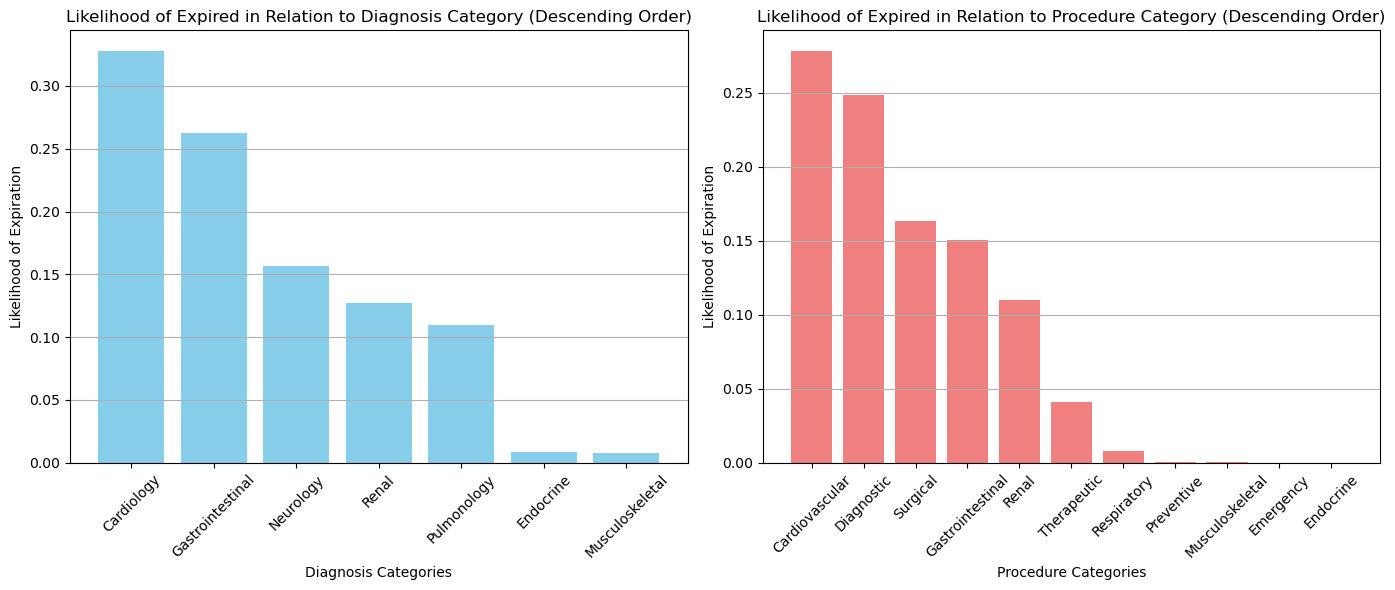

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out "Other" cases
df_filtered = df[~df['DiagnosisCategory'].isin(['Other'])]
df_filtered = df_filtered[~df_filtered['ProcedureCategory'].isin(['Other'])]

occurance_diag = {"Cardiology": 0, "Pulmonology": 0, "Neurology": 0, "Gastrointestinal": 0, "Musculoskeletal": 0, "Renal": 0, "Endocrine": 0}
occurance_proc = {"Surgical": 0, "Diagnostic": 0, "Therapeutic": 0, "Emergency": 0, "Preventive": 0, "Cardiovascular": 0, "Respiratory": 0, "Gastrointestinal": 0, "Musculoskeletal": 0, "Renal": 0, "Endocrine": 0}

for val in df_filtered['DiagnosisCategory']:
    if val in occurance_diag:
        occurance_diag[val] += 1

for val in df_filtered['ProcedureCategory']:
    if val in occurance_proc:
        occurance_proc[val] += 1
        

diagnosis_likelihood = {category: count / len(df_filtered) for category, count in occurance_diag.items()}
diagnosis_likelihood_sorted = dict(sorted(diagnosis_likelihood.items(), key=lambda item: item[1], reverse=True))


procedure_likelihood = {category: count / len(df_filtered) for category, count in occurance_proc.items()}
procedure_likelihood_sorted = dict(sorted(procedure_likelihood.items(), key=lambda item: item[1], reverse=True))

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for sorted Diagnosis Likelihood
axs[0].bar(diagnosis_likelihood_sorted.keys(), diagnosis_likelihood_sorted.values(), color='skyblue')
axs[0].set_title('Likelihood of Expired in Relation to Diagnosis Category (Descending Order)')
axs[0].set_xlabel('Diagnosis Categories')
axs[0].set_ylabel('Likelihood of Expiration')
axs[0].set_xticklabels(diagnosis_likelihood_sorted.keys(), rotation=45)
axs[0].grid(axis='y')

# Bar plot for sorted Procedure Likelihood
axs[1].bar(procedure_likelihood_sorted.keys(), procedure_likelihood_sorted.values(), color='lightcoral')
axs[1].set_title('Likelihood of Expired in Relation to Procedure Category (Descending Order)')
axs[1].set_xlabel('Procedure Categories')
axs[1].set_ylabel('Likelihood of Expiration')
axs[1].set_xticklabels(procedure_likelihood_sorted.keys(), rotation=45)
axs[1].grid(axis='y')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
